<a href="https://colab.research.google.com/github/Shivani-saran/Social-Analytics-Web-Development_Lab/blob/main/Experiment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SHIVANI_500075219

In [ ]:
import tweepy
import pandas as pd

In [ ]:
consumer_key="1J42kbl6Knwpva7wsLv1pBK1X"
consumer_secret="lSCoQfcwMJfe3ipVICwsrDLhALkuwyuAko5KFz1BscmvpMbKVK"
access_token="1498914827460247555-p8e9GbdYNgwNHh1ohsl31RMOFEJXOr"
access_token_secret="oclid72frFFgBOuKZ1wamd0jbRsliSNnFWTGK3Mn33vdW"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
def keyword_to_csv(keyword,recent):
    try:
        tweets = tweepy.Cursor(api.search,q=keyword).items(recent) #creates query method
        tweets_list = [[tweet.text] for tweet in tweets] 
        df = pd.DataFrame(tweets_list,columns=['Text']) 
        df.to_csv('{}.csv'.format(keyword), sep=',', index = False) 
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

In [ ]:
keyword = 'SpaceX'+ " -filter:retweets" 
recent  = 3000
keyword_to_csv(keyword, recent)

In [ ]:
df = pd.read_csv("/content/SpaceX -filter:retweets.csv") 
pd.options.display.max_colwidth = 200 
df.head() 

,Text
0,"@mayemusk @JoeBiden @POTUS @SpaceX Happy birthday SpaceX!!! We love you so much!!!! A great example of hard work, d… https://t.co/vyx66DaUEs"
1,SpaceX Falcon Heavy booster spotted at Kennedy Space Center\nhttps://t.co/uExWZHEePG https://t.co/dH72PmUEzB
2,@RMac18 Should have made his Tesla and SpaceX holdings the stakes
3,Happy 20th birthday to SpaceX
4,Retweet selected by the https://t.co/kmOCQTGgyJ team | SpaceX flies Starship rocket; it crash lands on launch pad… https://t.co/7LZwmUtWJp


In [ ]:
df.shape 

(3000, 1)

In [ ]:
a = df.loc[1272].to_string() 
print(a)


Text    Tesla, SpaceX Face ‘Significant’ Inflation Pressure, Musk Says https://t.co/ygZiAMz0rE https://t.co/dqa0dRVYlO


In [ ]:
import re

In [ ]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags = re.UNICODE)
match = re.sub(regex_pattern,'',a) 
print(match)

Text    Tesla, SpaceX Face ‘Significant’ Inflation Pressure, Musk Says https://t.co/ygZiAMz0rE https://t.co/dqa0dRVYlO


In [ ]:
a = df.loc[0].to_string()
print(a)

Text    @mayemusk @JoeBiden @POTUS @SpaceX Happy birthday SpaceX!!! We love you so much!!!! A great example of hard work, d… https://t.co/vyx66DaUEs


In [ ]:
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
match = re.sub(pattern,'',a)
print(match)

Text    @mayemusk @JoeBiden @POTUS @SpaceX Happy birthday SpaceX!!! We love you so much!!!! A great example of hard work, d… 


In [ ]:
a = df.loc[3].to_string()
print(a)

Text    Happy 20th birthday to SpaceX


In [ ]:
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )
match = re.sub(combined_re,'',a)
print(match)

Text    Happy 20th birthday to SpaceX


In [ ]:
from bs4 import BeautifulSoup
a = df.loc[27].to_string()
print(a)

Text    @elonmusk Help them.... let the children to have chance to dream and hope again, can you SpaceX rocket be Missile 😅… https://t.co/bW8SRGwQ3w


In [ ]:
del_amp = BeautifulSoup(a, 'lxml')
del_amp_text = del_amp.get_text()
print(del_amp_text)

Text    @elonmusk Help them.... let the children to have chance to dream and hope again, can you SpaceX rocket be Missile 😅… https://t.co/bW8SRGwQ3w


In [ ]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [ ]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,3000): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,3000))                                                                  
    cleaned_tweets.append(cleaning_tweets((df.Text[i])))

Cleaning the tweets...

Tweets 100 of 3000 have ben processed
Tweets 200 of 3000 have ben processed
Tweets 300 of 3000 have ben processed
Tweets 400 of 3000 have ben processed
Tweets 500 of 3000 have ben processed
Tweets 600 of 3000 have ben processed
Tweets 700 of 3000 have ben processed
Tweets 800 of 3000 have ben processed
Tweets 900 of 3000 have ben processed
Tweets 1000 of 3000 have ben processed
Tweets 1100 of 3000 have ben processed
Tweets 1200 of 3000 have ben processed
Tweets 1300 of 3000 have ben processed


/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/QuBJWwns4P" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/e5iTweVhbr" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Tweets 1400 of 3000 have ben processed
Tweets 1500 of 3000 have ben processed
Tweets 1600 of 3000 have ben processed
Tweets 1700 of 3000 have ben processed
Tweets 1800 of 3000 have ben processed
Tweets 1900 of 3000 have ben processed
Tweets 2000 of 3000 have ben processed


/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/wuGC37XWYH

#Tesla" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/HYncQQG7NF" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Tweets 2100 of 3000 have ben processed
Tweets 2200 of 3000 have ben processed
Tweets 2300 of 3000 have ben processed
Tweets 2400 of 3000 have ben processed
Tweets 2500 of 3000 have ben processed
Tweets 2600 of 3000 have ben processed
Tweets 2700 of 3000 have ben processed
Tweets 2800 of 3000 have ben processed
Tweets 2900 of 3000 have ben processed
Tweets 3000 of 3000 have ben processed


/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/5s1ejPYX1v" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/MtFTulSrzR" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/zDaByEdvtH" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

In [ ]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["elonmusk","elon musk","elon","musk","spacex"]) 

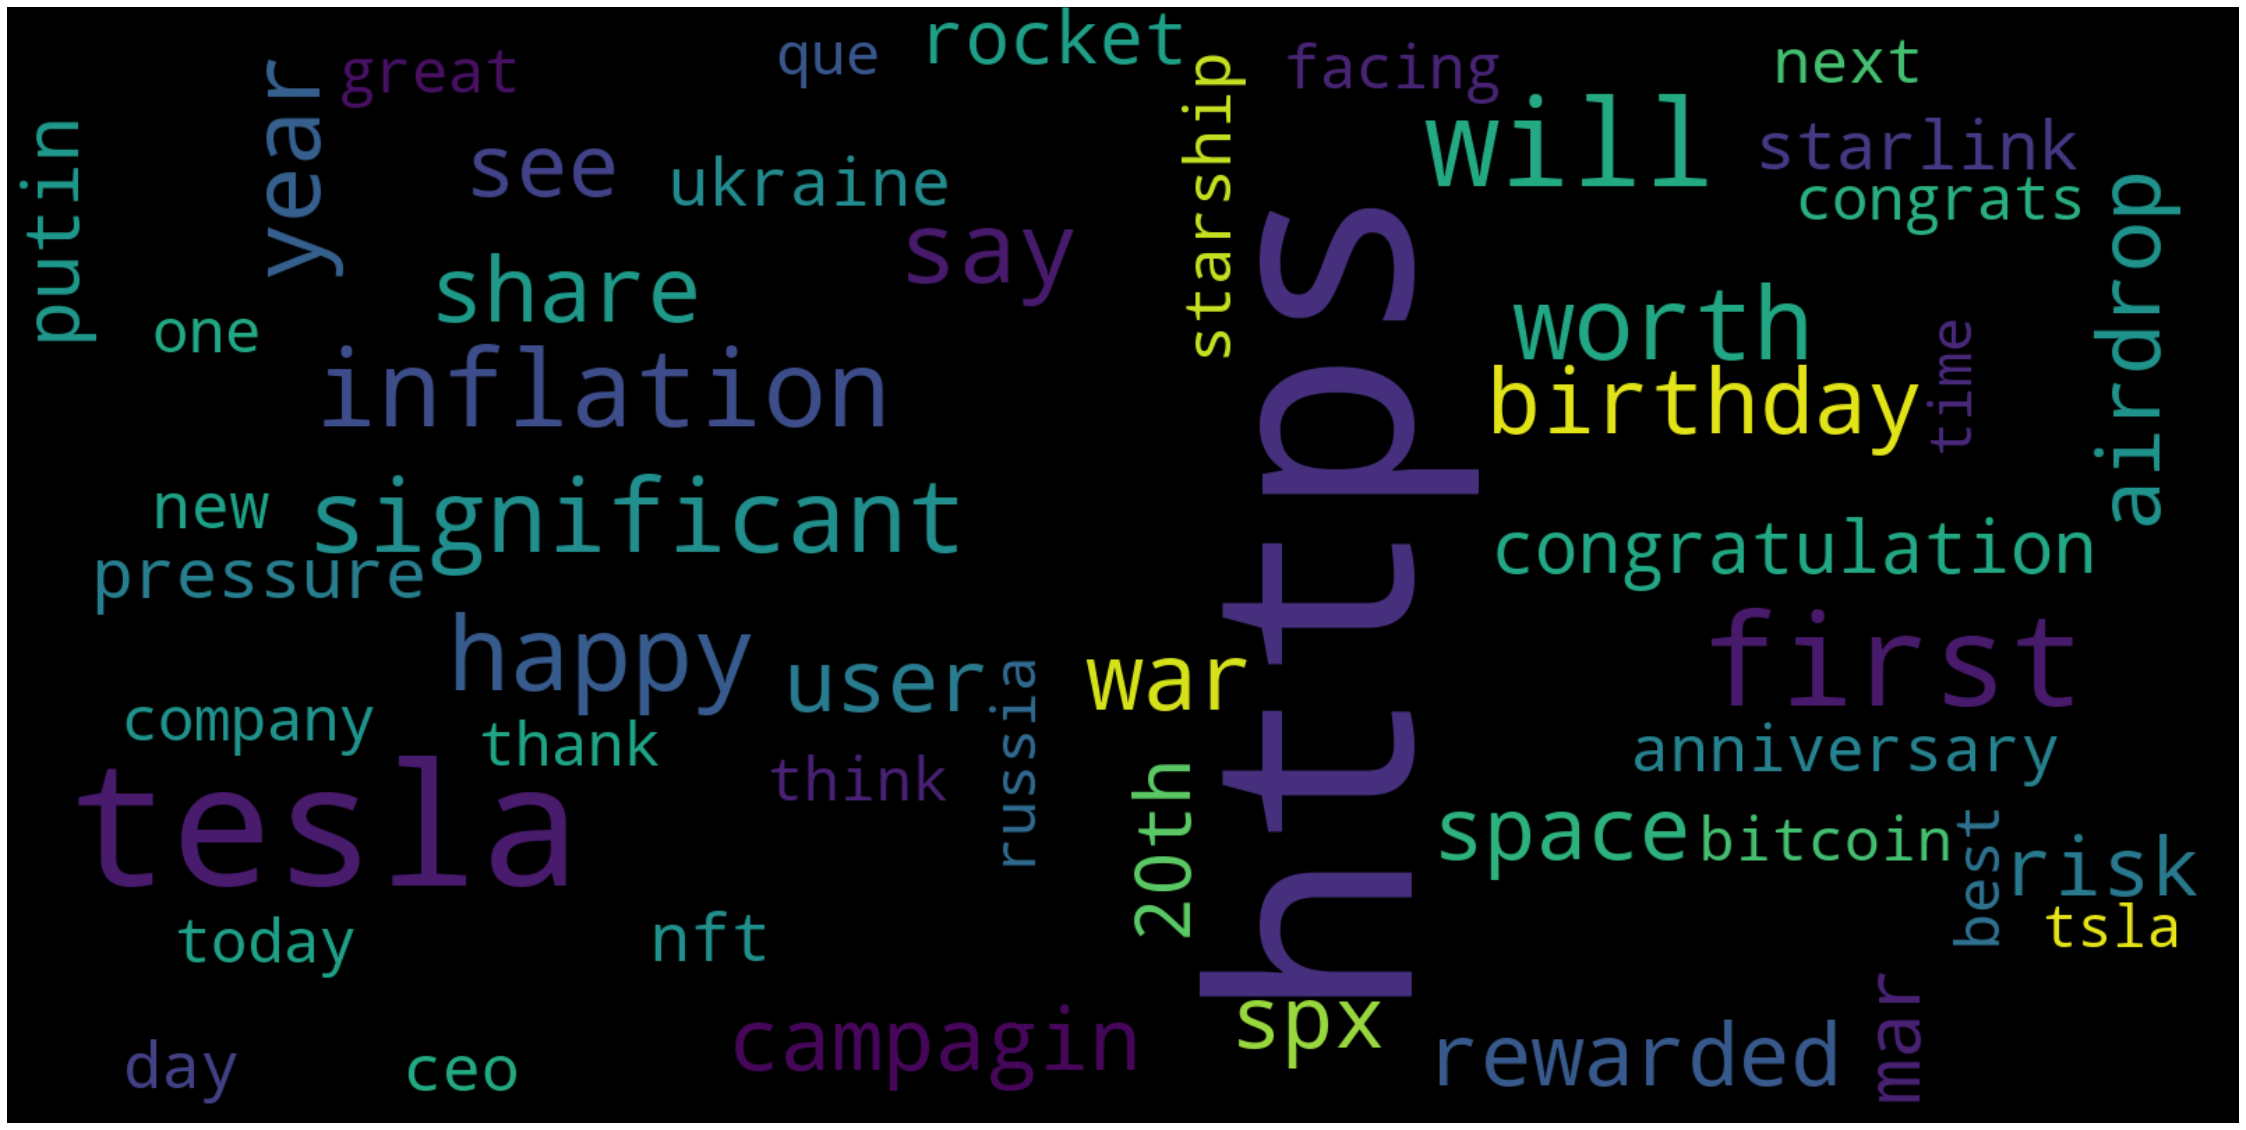

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

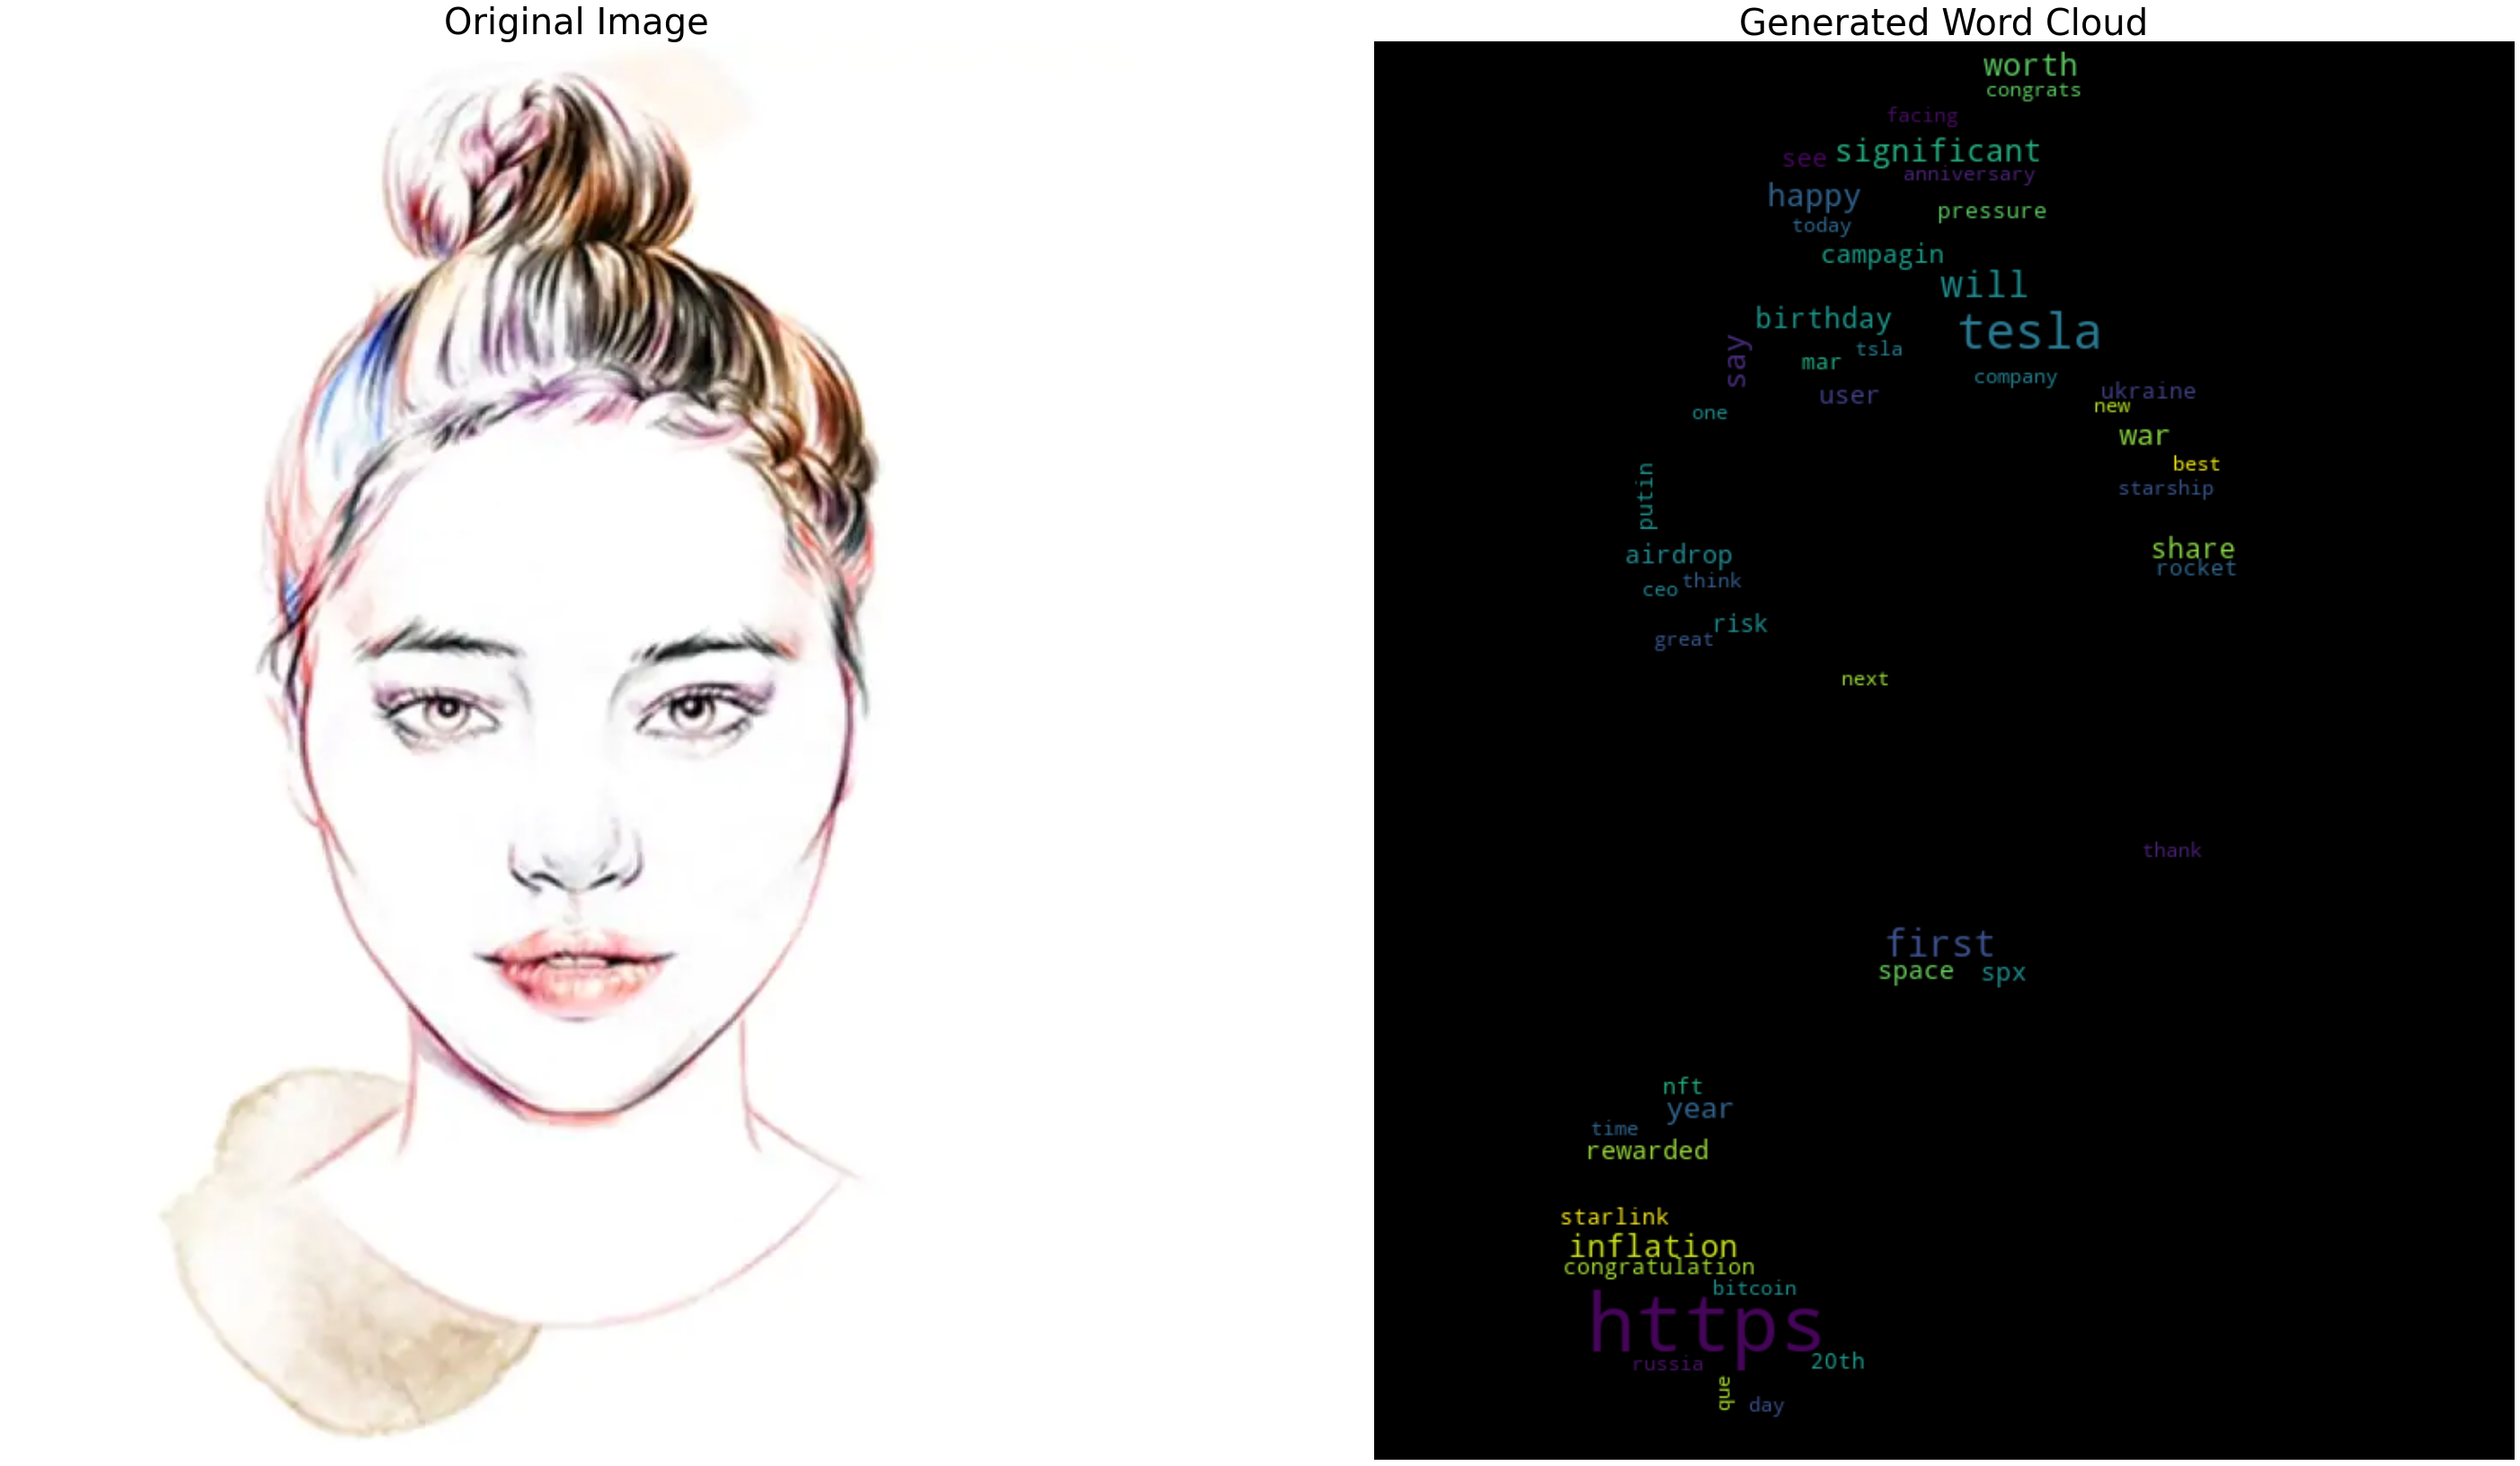

In [ ]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('/content/X_SGH_FaceShape2020_ImageWomen_HER-min.webp'))
wordcloud = WordCloud(width=1600, mask =   mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False).generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Image', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Generated Word Cloud', size=40)
plt.axis("off")
plt.show()